In [0]:
#Tensorflow is a framework of deep learning and machine learning.
# TensorFlow makes it easy for beginners and experts to create machine learning models for desktop, mobile, web, and cloud. 
# Tensorflow architecture works in three parts
# 1.Preprocessing the data
# 2.Build the model
# 3.train and estimate the model


In [0]:
!pip install tensorflow
!pip install keras
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
!pip install mlxtend

In [0]:
fashion_data=keras.datasets.fashion_mnist

In [0]:
type(fashion_data)

tensorflow.python.util.module_wrapper.TFModuleWrapper

In [0]:
(x_train,y_train),(x_test,y_test)=fashion_data.load_data()

In [0]:
x_train.shape

(60000, 28, 28)

In [0]:
y_train.shape

(60000,)

In [0]:
np.mean(x_train)

72.94035223214286

In [0]:
np.max(x_train)

255

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [0]:
#data Exploration
x_test.shape

(10000, 28, 28)

In [0]:
x_train.shape

(60000, 28, 28)

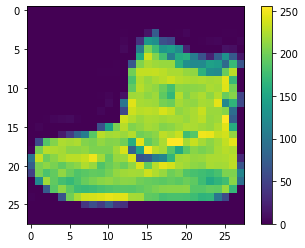

In [0]:
# Visualization of the  fashion data
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()

In [0]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [0]:
x_train=x_train/255


In [0]:
x_test=x_test/255

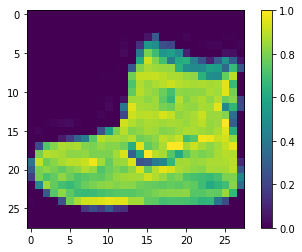

In [0]:
# Visualization of the  fashion data
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()

In [0]:
# Build the model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense

In [0]:
model=Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [0]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [0]:
#Model Compilation contains Three Properties
# 1.Loss Function
# 2.Optimizer
# 3.Metrics
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [0]:
history=model.fit(x_train,y_train,epochs=10,batch_size=10,validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 11s 238us/sample - loss: 0.4994 - acc: 0.8215 - val_loss: 0.4264 - val_acc: 0.8467
Epoch 2/10
48000/48000 [==============================] - 11s 231us/sample - loss: 0.3772 - acc: 0.8608 - val_loss: 0.3638 - val_acc: 0.8673
Epoch 3/10
48000/48000 [==============================] - 11s 239us/sample - loss: 0.3392 - acc: 0.8765 - val_loss: 0.3683 - val_acc: 0.8658
Epoch 4/10
48000/48000 [==============================] - 12s 254us/sample - loss: 0.3122 - acc: 0.8857 - val_loss: 0.3382 - val_acc: 0.8769
Epoch 5/10
48000/48000 [==============================] - 12s 255us/sample - loss: 0.2938 - acc: 0.8914 - val_loss: 0.3328 - val_acc: 0.8821
Epoch 6/10
48000/48000 [==============================] - 14s 288us/sample - loss: 0.2833 - acc: 0.8949 - val_loss: 0.3430 - val_acc: 0.8800
Epoch 7/10
48000/48000 [==============================] - 12s 255us/sample - loss: 0.2702 - acc: 0.9001 

In [0]:
# Evaluate Accuracy
test_loss,test_acc=model.evaluate(x_test,y_test)

10000/10000 [==============================] - 0s 36us/sample - loss: 0.3743 - acc: 0.8736


In [0]:
print(test_acc)

0.8736


In [0]:
# make prediction
from sklearn.metrics import accuracy_score

In [0]:
y_pred=model.predict_classes(x_test)

In [0]:
accuracy_score(y_test,y_pred)

0.8736

In [0]:
pred=model.predict(x_test)

In [0]:
pred

array([[6.8810910e-14, 2.9450921e-15, 1.6711933e-14, ..., 2.2194958e-04,
        5.6579268e-12, 9.9972624e-01],
       [6.3013329e-05, 1.7040979e-17, 9.9667680e-01, ..., 2.6708236e-27,
        1.1291219e-12, 2.9101343e-18],
       [3.0426480e-15, 1.0000000e+00, 6.4972945e-26, ..., 2.1698916e-38,
        1.6618474e-17, 2.9873699e-33],
       ...,
       [8.2711779e-07, 3.1545238e-16, 1.3182736e-08, ..., 1.4784808e-13,
        9.9998844e-01, 1.2803405e-14],
       [5.9432562e-15, 1.0000000e+00, 3.5540857e-21, ..., 1.8041527e-24,
        7.6403253e-14, 1.5412338e-22],
       [4.8408847e-08, 1.5352574e-12, 2.3456273e-08, ..., 5.1232195e-04,
        1.4672748e-05, 1.1533589e-05]], dtype=float32)

In [0]:
np.argmax(pred[0])

9

In [0]:
help(model)

Help on Sequential in module tensorflow.python.keras.engine.sequential object:

class Sequential(tensorflow.python.keras.engine.training.Model)
 |  Linear stack of layers.
 |  
 |  Arguments:
 |      layers: list of layers to add to the model.
 |  
 |  Example:
 |  
 |  ```python
 |  # Optionally, the first layer can receive an `input_shape` argument:
 |  model = Sequential()
 |  model.add(Dense(32, input_shape=(500,)))
 |  # Afterwards, we do automatic shape inference:
 |  model.add(Dense(32))
 |  
 |  # This is identical to the following:
 |  model = Sequential()
 |  model.add(Dense(32, input_dim=500))
 |  
 |  # And to the following:
 |  model = Sequential()
 |  model.add(Dense(32, batch_input_shape=(None, 500)))
 |  
 |  # Note that you can also omit the `input_shape` argument:
 |  # In that case the model gets built the first time you call `fit` (or other
 |  # training and evaluation methods).
 |  model = Sequential()
 |  model.add(Dense(32))
 |  model.add(Dense(32))
 |  model.co

In [0]:
history.history

{'acc': [0.8215208,
  0.86075,
  0.8765,
  0.8856875,
  0.89135414,
  0.8949375,
  0.900125,
  0.9036458,
  0.90608335,
  0.90947914],
 'loss': [0.4993931148874496,
  0.37719600173715057,
  0.339211270674338,
  0.3122068584926213,
  0.29384851226921455,
  0.2832970500988449,
  0.27015549703137975,
  0.25915675920953923,
  0.24891154981075866,
  0.24135855266182413],
 'val_acc': [0.8466667,
  0.86733335,
  0.86575,
  0.87691665,
  0.88208336,
  0.88,
  0.87425,
  0.88816667,
  0.8839167,
  0.88383335],
 'val_loss': [0.42635465276272344,
  0.36382104229337225,
  0.3682695797958877,
  0.3381870135880308,
  0.3327686681043512,
  0.3430212736990749,
  0.3577523567240375,
  0.3303864246330583,
  0.33776017832642535,
  0.3335083301180142]}

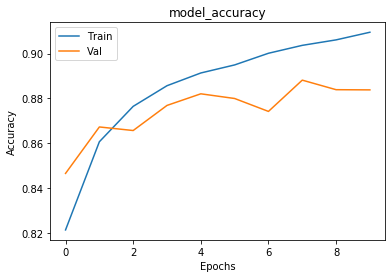

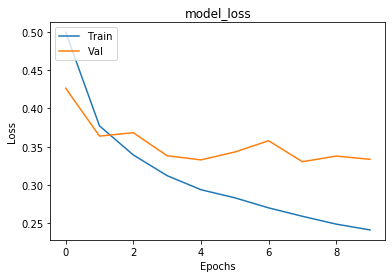

In [0]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model_accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Val'],loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model_loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train','Val'],loc='upper left')
plt.show()

In [0]:
# overfitting :if accuracy is more than validation accuracy then model is overfitted.here in this chart we see that modelis overfitted.

Plotting Confusion Matrix

In [0]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

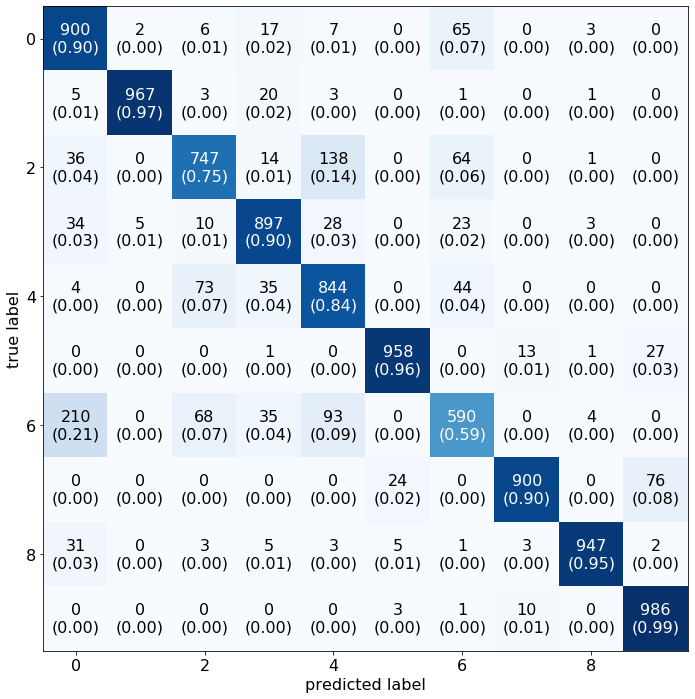

In [0]:
font={
    'family':'Times New Roman',
    'weight':'normal',
    'size':16
}
plt.rc('font',**font)
mat=confusion_matrix(y_test,y_pred)
fig,ax=plot_confusion_matrix(conf_mat=mat,figsize=(10,10),show_normed=True)
plt.tight_layout()
fig.savefig('fashion.png')